<a href="https://colab.research.google.com/github/ilgazali/neural_networks/blob/main/fruit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np


In [2]:
#Bu fonksiyon, belirtilen klasördeki tüm .jpeg dosyalarını okur ve gri ölçekliye dönüştürür. 
#Ardından, boyutunu 100x100 piksele düşürür ve piksel değerlerini [0,1] aralığına normalize eder. 
#Etiketler elma veya avakado olarak belirlenir ve rastgele karıştırılır.
# Son olarak, fonksiyon görüntüleri ve etiketleri numpy dizileri olarak döndürür.

def ReadFiles(folder):
    images = []
    labels = []
    
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if not os.path.isdir(subfolder_path):
            continue
        
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.jpeg'):
                img = cv2.imread(os.path.join(subfolder_path, filename))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (100, 100))
                img = img / 255.0
                images.append(img)

                label = 1 if subfolder == 'avocado' else 0
                labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    idx = np.random.permutation(len(images))
    images, labels = images[idx], labels[idx]

    return images, labels


In [3]:
train_folder = '/content/train'
test_folder = '/content/test'

train_images, train_labels = ReadFiles(train_folder)
test_images, test_labels = ReadFiles(test_folder)

#check whether everythings are fine
print("Images shape:", test_images.shape) 
print("Labels shape:", test_labels.shape)


Images shape: (194, 100, 100)
Labels shape: (194,)


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# PCA için verileri yeniden şekillendirin.
n_samples_train, height_train, width_train = train_images.shape
n_samples_test, height_test, width_test = test_images.shape
train_images_reshaped = train_images.reshape(n_samples_train, height_train * width_train)
test_images_reshaped = test_images.reshape(n_samples_test, height_test * width_test)


In [6]:
# PCA modelini tanımlayın ve eğitin
pca = PCA(n_components=50)
pca.fit(train_images_reshaped)

PCA(n_components=50)

In [7]:
# PCA'ya göre eğitim ve test verilerini dönüştürün
train_images_pca = pca.transform(train_images_reshaped)
test_images_pca = pca.transform(test_images_reshaped)

In [8]:
# Verileri normalleştirin
scaler = StandardScaler()
train_images_normalized = scaler.fit_transform(train_images_pca)
test_images_normalized = scaler.transform(test_images_pca)

In [9]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


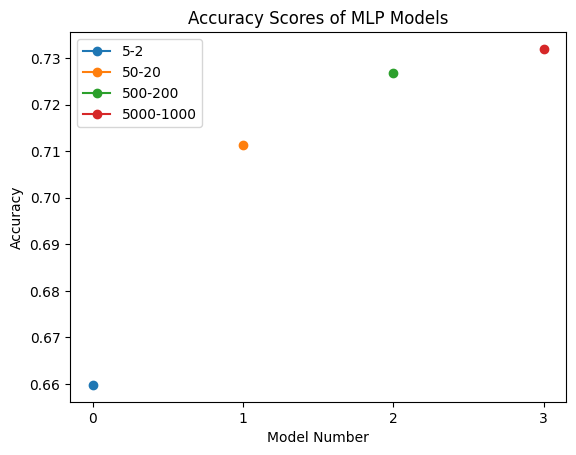

Model 1 (5-2 neurons) accuracy: 0.6598
Model 2 (50-20 neurons) accuracy: 0.7113
Model 3 (500-200 neurons) accuracy: 0.7268
Model 4 (5000-1000 neurons) accuracy: 0.7320


In [10]:

# Dört yapay sinir ağı modeli için nöron sayıları
neuron_numbers = [(5,2), (50,20), (500,200), (5000,1000)]

# Her bir modelin doğruluk değerlerini tutacak liste
accuracies = []

for i, neurons in enumerate(neuron_numbers):
    # Yapay sinir ağı modelini tanımla ve eğit
    model = MLPClassifier(hidden_layer_sizes=neurons, max_iter=1000, random_state=42)
    model.fit(train_images_normalized, train_labels)

    # Test verileri üzerinde modelin doğruluğunu hesapla
    accuracy = model.score(test_images_normalized, test_labels)
    accuracies.append(accuracy)

    # Grafik çizdirme için kullanılacak isimleri ve renkleri tanımla
    name = str(neurons[0]) + '-' + str(neurons[1])
    color = 'C' + str(i)

    # Doğruluk değerini grafik olarak çizdir
    plt.plot(i, accuracy, marker='o', color=color, label=name)

# Grafikleri özelleştir
plt.title("Accuracy Scores of MLP Models")
plt.xlabel("Model Number")
plt.ylabel("Accuracy")
plt.xticks(range(len(neuron_numbers)))
plt.legend()

# Grafikleri göster
plt.show()

# Sonuçları ekrana yazdır
for i, neurons in enumerate(neuron_numbers):
    name = str(neurons[0]) + '-' + str(neurons[1])
    print("Model {} ({} neurons) accuracy: {:.4f}".format(i+1, name, accuracies[i]))

#Sonuç olarak, grafikte gösterildiği gibi, daha büyük nöron sayılarına sahip modeller 
#daha yüksek doğruluk oranlarına sahip olma eğilimindedir. 
#En yüksek doğruluk oranına sahip model, 5000 nöronlu ilk gizli katman
# ve 1000 nöronlu ikinci gizli katmana sahip olan modeldir.